In [1]:
# MDCM Data Prep File

# Import Packages
import pandas as pd 
import numpy as np

# Load data for 2002-2022 and drop duplicates
df_2022 = pd.read_csv('DATA/NCAA_Tourney_2002_2022.csv')
df_2022 = df_2022.drop_duplicates()

# Load data for 2023 and drop duplicates
df_2023 = pd.read_csv('DATA/NCAA_Tourney_2023.csv')
df_2023 = df_2023.drop_duplicates()

df_2024 = pd.read_csv('DATA/NCAA_Tourney_2024.csv')
df_2024 = df_2024.drop_duplicates()

# Delete fields from 2002-2022 data not in 2023 data
drop_cols_2022 = ['num_ot', 'team1_coaches_before_final', 'team2_coaches_before_final', 'WLoc', 'team1_score', 'team2_score']

df_2022 = df_2022.drop(columns=drop_cols_2022)

# Delete fields from 2023 data not in 2022 data
drop_cols_2023_24 = ['team1_coach_name', 'team2_coach_name', 'team1_coaches_final', 'team2_coaches_final']

df_2023 = df_2023.drop(columns=drop_cols_2023_24)
df_2024 = df_2024.drop(columns=drop_cols_2023_24)

# Concat df together
df_init = pd.concat([df_2022, df_2023, df_2024])

# Sort data by season and game_id
df_init = df_init.sort_values(by=['game_id'], ascending=True)

# Reset index
df_init.reset_index(drop=True)

,team1_id,team2_id,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,...,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id
0,1104,1194,Y02,Y15,2,15,2.0,15.0,Y,Y,...,111.4954,95.2313,93.8770,71.2357,71.2446,100.2897,96.8669,98.4183,99.9263,2002-1104-1194
1,1112,1364,Z03,Z14,3,14,3.0,14.0,Z,Z,...,117.3877,104.0411,96.9262,63.2345,64.7948,105.2163,105.4534,96.0965,97.6704,2002-1112-1364
2,1112,1461,Z03,Z11,3,11,3.0,11.0,Z,Z,...,117.3877,104.0411,96.9262,69.6172,70.4124,105.3654,106.0370,97.0568,96.6601,2002-1112-1461
3,1143,1335,Y06,Y11,6,11,6.0,11.0,Y,Y,...,108.4214,94.9897,93.0913,65.6728,66.8930,109.5414,106.9622,94.2234,95.1915,2002-1143-1335
4,1153,1131,Z01,Z16,1,16,1.0,16.0,Z,Z,...,115.7842,86.3924,88.0357,65.0025,65.8612,102.6611,99.5634,95.6198,101.1011,2002-1153-1131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,1463,1436,W13,Z13,13,13,13.0,13.0,W,Z,...,110.8250,102.1650,101.3520,65.4814,63.2333,107.5330,107.1220,97.2349,100.1450,2024-1463-1436
3654,1463,1438,W13,Y10b,13,10,10.0,13.0,W,Y,...,110.8250,102.1650,101.3520,61.2676,59.9122,102.7890,105.4220,96.0936,93.3467,2024-1463-1438
3655,1463,1443,W13,Z15,13,15,13.0,15.0,W,Z,...,110.8250,102.1650,101.3520,75.4183,75.1443,104.9380,105.5520,98.5188,102.4890,2024-1463-1443
3656,1463,1447,W13,X16b,13,16,13.0,16.0,W,X,...,110.8250,102.1650,101.3520,62.5685,61.2530,97.4514,95.7835,99.3912,105.8780,2024-1463-1447


In [2]:
# VIF Analysis to identify multicollinearity on initial dataset

# Import packages
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Convert non-numeric columns to numeric
df_vif_pca = df_init.apply(pd.to_numeric, errors='coerce')

# Remove non-numeric fields
drop_columns = ['team1_id', 'team2_id', 'game_id', 'team1_position', 'team2_position', 'team1_region', 'team2_region', 'slot', 'team1_teamname', 'team2_teamname', 'host', 'team1_coach_id', 'team2_coach_id', 'team1_ap_final', 'team2_ap_final', 'team1_seed', 'team2_seed', 'strongseed', 'weakseed']

df_vif_pca = df_vif_pca.drop(columns=drop_columns)

# Fill NA's with 0
df_vif_pca = df_vif_pca.fillna(value=0)

# Calculating VIF
X = add_constant(df_vif_pca)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

# Show results
vif_data

,Variable,VIF
0,const,481792.679290
1,team1_pt_career_school_wins,123.754787
2,team2_pt_career_school_wins,102.165792
3,team1_pt_career_overall_wins,94.356748
4,team2_pt_career_overall_wins,93.387727
...,...,...
75,team1_lat,1.685080
76,team1_pt_team_season_wins,1.517641
77,host_long,1.420580
78,host_lat,1.405971


In [3]:
# Add data fields

# Make copy of df
df = df_init.copy()

# Get seed differential; a seed_diff > 0 means the game was an upset
df['team1_seed_diff'] = df['team2_seed'].astype(int) - df['team1_seed'].astype(int)
df['team2_seed_diff'] = df['team1_seed_diff']*-1

# Function to calculate distance between two points
from geopy.distance import geodesic

def calc_distance(lat1, lon1, lat2, lon2):
    # Coordinates of the two points (latitude, longitude)
    point1 = (lat1, lon1)
    point2 = (lat2, lon2)

    # Calculate the distance between the two points
    distance = geodesic(point1, point2).kilometers
    return distance

# Calculate distance between host and team1 campus
df['team1_dist_km'] = df.apply(lambda row: calc_distance(row['host_lat'], row['host_long'], row['team1_lat'], row['team1_long']), axis=1)

# Calculate distance between host and team2 campus
df['team2_dist_km'] = df.apply(lambda row: calc_distance(row['host_lat'], row['host_long'], row['team2_lat'], row['team2_long']), axis=1)

In [4]:
# Calculate expected win % and LogOdd for each team

# Make copy of df
df1 = df.copy()

# Calculate pythag expected win % using KenPom metric
df1['team1_exp_win'] = (df1['team1_adjoe']**11.5)/ ((df1['team1_adjde']**11.5)+(df1['team1_adjoe']**11.5))
df1['team2_exp_win'] = (df1['team2_adjoe']**11.5)/ ((df1['team2_adjde']**11.5)+(df1['team2_adjoe']**11.5))

# Calculate Log5 Odds of team 1 winning the game
df1['team1_log5'] = (df1['team1_exp_win'] - (df1['team1_exp_win']*df1['team2_exp_win']))/ (df1['team1_exp_win']+df1['team2_exp_win']-(2*df1['team1_exp_win']*df1['team2_exp_win']))

# Likelihood of team 2 winning game is 1-LogOdds of team1
df1['team2_log5'] = 1 - df1['team1_log5']

# Calculate composite shooting % for each team
weight_ft = .167
weight_2p = .333 # worth double that of FT
weight_3p = .5 # 3pts are 50% more than 2pt

# Calculate team 1 and 2 shooting %
df1['team1_shooting_%'] = (df1['team1_fg2pct']*weight_2p) + (df1['team1_fg3pct']*weight_3p) + (df1['team1_ftpct']*weight_ft)

df1['team2_shooting_%'] = (df1['team2_fg2pct']*weight_2p) + (df1['team2_fg3pct']*weight_3p) + (df1['team2_ftpct']*weight_ft)

# Calculate opp team shooting %
df1['team1_opp_shooting%'] = (df1['team1_oppfg2pct']*weight_2p) + (df1['team1_oppfg3pct']*weight_3p) + (df1['team1_oppftpct']*weight_ft)

df1['team2_opp_shooting%'] = (df1['team2_oppfg2pct']*weight_2p) + (df1['team2_oppfg3pct']*weight_3p) + (df1['team2_oppftpct']*weight_ft)

In [5]:
# Get adj tempo data for each team
efficiency_cols = ['team1_adjoe', 'team1_adjde', 'team1_adjtempo', 'team2_adjoe', 'team2_adjde', 'team2_adjtempo']

df_efficiency = df1[['season', 'team1_adjoe', 'team1_adjde', 'team1_adjtempo', 'team2_adjoe', 'team2_adjde', 'team2_adjtempo']]

# Get average adj tempo by year
df_efficiency = df_efficiency.groupby(['season'])[efficiency_cols].mean().reset_index()

# Calculate averages for each year
df_efficiency['avg_tempo'] = (df_efficiency['team1_adjtempo'] + df_efficiency['team2_adjtempo'])/2
df_efficiency['avg_adjoe'] = (df_efficiency['team1_adjoe'] + df_efficiency['team2_adjoe'])/2
df_efficiency['avg_adjde'] = (df_efficiency['team1_adjde'] + df_efficiency['team2_adjde'])/2

# Drop columns
df_efficiency= df_efficiency.drop(columns=efficiency_cols)

# Make copy of df
df2 = df1.copy()

# Join with df to get avg adj tempo for each team
df2 = pd.merge(df2, df_efficiency, on='season', how='inner')

# Make copy of df
df3 = df2.copy()

# Calculate expected tempo for each game
df3['exp_tempo'] = (df3['team1_adjtempo']/df3['avg_tempo'])*(df3['team2_adjtempo']/df3['avg_tempo'])*df3['avg_tempo']

# Calc tempo differential
df3['team1_tempo_diff'] = df3['team1_adjtempo'] - df3['exp_tempo']
df3['team2_tempo_diff'] = df3['team2_adjtempo'] - df3['exp_tempo']

# Rename season to year so regex doesn't include preseason/season
df3.rename(columns={'season': 'year'}, inplace=True)

# Preview df
df3

,team1_id,team2_id,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,...,team1_shooting_%,team2_shooting_%,team1_opp_shooting%,team2_opp_shooting%,avg_tempo,avg_adjoe,avg_adjde,exp_tempo,team1_tempo_diff,team2_tempo_diff
0,1104,1194,Y02,Y15,2,15,2.0,15.0,Y,Y,...,44.590490,43.104531,42.342928,44.851876,69.897916,110.282764,94.681263,71.246826,-1.346726,-0.002226
1,1112,1364,Z03,Z14,3,14,3.0,14.0,Z,Z,...,47.658492,48.737690,45.038889,42.009215,69.897916,110.282764,94.681263,67.504197,5.316503,-2.709397
2,1112,1461,Z03,Z11,3,11,3.0,11.0,Z,Z,...,47.658492,43.946449,45.038889,44.312180,69.897916,110.282764,94.681263,73.356697,-0.535997,-2.944297
3,1143,1335,Y06,Y11,6,11,6.0,11.0,Y,Y,...,44.230013,49.850830,43.674743,43.724353,69.897916,110.282764,94.681263,65.084714,2.923686,1.808286
4,1153,1131,Z01,Z16,1,16,1.0,16.0,Z,Z,...,46.849360,44.517483,39.680530,42.195213,69.897916,110.282764,94.681263,64.746787,3.968413,1.114413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,1463,1436,W13,Z13,13,13,13.0,13.0,W,Z,...,46.585738,46.488687,45.551680,43.293950,67.259660,114.268431,99.845500,60.660088,3.862512,2.573212
3654,1463,1438,W13,Y10b,13,10,10.0,13.0,W,Y,...,46.585738,44.364198,45.551680,43.265975,67.259660,114.268431,99.845500,57.474137,7.048463,2.438063
3655,1463,1443,W13,Z15,13,15,13.0,15.0,W,Z,...,46.585738,46.538424,45.551680,43.624359,67.259660,114.268431,99.845500,72.086383,-7.563783,3.057917
3656,1463,1447,W13,X16b,13,16,13.0,16.0,W,X,...,46.585738,41.879586,45.551680,43.165044,67.259660,114.268431,99.845500,58.760374,5.762226,2.492626


In [6]:
# Split data

# Get team 1's columns
df_team1 = df3.filter(regex="team1_|game|year")

# Team 1 is winning team
df_team1['winner'] = 1

# Get team 2's columns
df_team2 = df3.filter(regex="team2_|game|year")

# Team 2 is losing team
df_team2['winner'] = 0

# Dynamically rename fields
new_prefix = ""

def updateColNames(df, old_prefix, new_prefix):
    df.columns = [col.replace(old_prefix, new_prefix) for col in df.columns]
    return df
    
df_team1 = updateColNames(df_team1, "team1_", new_prefix)
df_team2 = updateColNames(df_team2, "team2_", new_prefix)

# Append dataframes
df_ncaa = pd.concat([df_team1, df_team2], axis=0)

# Sort on game_id
df_ncaa = df_ncaa.sort_values(by='game_id', ascending=True)

# Preview data
df_ncaa

/var/folders/65/9l3qmfc96xsdxtpbjzp_y53w0000gn/T/ipykernel_68314/1342569607.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team1['winner'] = 1
/var/folders/65/9l3qmfc96xsdxtpbjzp_y53w0000gn/T/ipykernel_68314/1342569607.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team2['winner'] = 0


,id,position,seed,region,teamname,year,lat,long,coach_id,pt_school_ncaa,...,adjde,game_id,seed_diff,dist_km,exp_win,log5,shooting_%,opp_shooting%,tempo_diff,winner
0,1104,Y02,2,Y,Alabama,2002,33.214400,-87.545766,mark-gottfried-1,0.0,...,93.8770,2002-1104-1194,13,971.569051,0.878465,0.911780,44.590490,42.342928,-1.346726,1
0,1194,Y15,15,Y,FL Atlantic,2002,26.372536,-80.102293,sidney-green-1,0.0,...,99.9263,2002-1104-1194,-13,1055.792866,0.411542,0.088220,43.104531,44.851876,-0.002226,0
1,1112,Z03,3,Z,Arizona,2002,32.232071,-110.950769,lute-olson-1,17.0,...,96.9262,2002-1112-1364,11,513.706780,0.900485,0.789333,47.658492,45.038889,5.316503,1
1,1364,Z14,14,Z,Santa Barbara,2002,34.415462,-119.848071,bob-williams-1,0.0,...,97.6704,2002-1112-1364,-11,1213.507998,0.707177,0.210667,48.737690,42.009215,-2.709397,0
2,1112,Z03,3,Z,Arizona,2002,32.232071,-110.950769,lute-olson-1,17.0,...,96.9262,2002-1112-1461,8,513.706780,0.900485,0.757288,47.658492,45.038889,-0.535997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,1463,W13,13,W,Yale,2024,41.310189,-72.928860,james-jones-3,3.0,...,101.3520,2024-1463-1443,2,3548.049582,0.736442,0.665723,46.585738,45.551680,-7.563783,1
3656,1447,X16b,16,X,Wagner,2024,40.615003,-74.095730,donald-copeland-1,0.0,...,105.8780,2024-1463-1447,-3,3448.521613,0.240075,0.101577,41.879586,43.165044,2.492626,0
3656,1463,W13,13,W,Yale,2024,41.310189,-72.928860,james-jones-3,3.0,...,101.3520,2024-1463-1447,3,3548.049582,0.736442,0.898423,46.585738,45.551680,5.762226,1
3657,1463,W13,13,W,Yale,2024,41.310189,-72.928860,james-jones-3,3.0,...,101.3520,2024-1463-1458,-8,3548.049582,0.736442,0.242847,46.585738,45.551680,2.020165,1


In [7]:
# Make copy of df
df_ncaa_1 = df_ncaa.copy()

# Drop unadjusted efficiency columns
unadjusted_eff = ['tempo', 'oe', 'de']
df_ncaa_1 = df_ncaa_1.drop(columns=unadjusted_eff)

# Drop all columns related to aggregated coach stats & irrelevant season rankings
search_text = ['school', 'overall', 'career', 'coach_season', 'final', 'position', 'region', 'lat', 'long']

# Drop columns based on each item in the search list
for item in search_text:
    df_ncaa_1 = df_ncaa_1.drop(columns=[col for col in df_ncaa_1.columns if item in col])

# Preview df
df_ncaa_1

,id,seed,teamname,year,coach_id,pt_team_season_wins,pt_team_season_losses,ap_preseason,coaches_preseason,fg2pct,...,adjde,game_id,seed_diff,dist_km,exp_win,log5,shooting_%,opp_shooting%,tempo_diff,winner
0,1104,2,Alabama,2002,mark-gottfried-1,26.0,7,24.0,NaN,50.657900,...,93.8770,2002-1104-1194,13,971.569051,0.878465,0.911780,44.590490,42.342928,-1.346726,1
0,1194,15,FL Atlantic,2002,sidney-green-1,19.0,11,NaN,NaN,45.035500,...,99.9263,2002-1104-1194,-13,1055.792866,0.411542,0.088220,43.104531,44.851876,-0.002226,0
1,1112,3,Arizona,2002,lute-olson-1,22.0,9,NaN,NaN,50.000000,...,96.9262,2002-1112-1364,11,513.706780,0.900485,0.789333,47.658492,45.038889,5.316503,1
1,1364,14,Santa Barbara,2002,bob-williams-1,20.0,10,NaN,NaN,47.041400,...,97.6704,2002-1112-1364,-11,1213.507998,0.707177,0.210667,48.737690,42.009215,-2.709397,0
2,1112,3,Arizona,2002,lute-olson-1,22.0,9,NaN,NaN,50.000000,...,96.9262,2002-1112-1461,8,513.706780,0.900485,0.757288,47.658492,45.038889,-0.535997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,1463,13,Yale,2024,james-jones-3,22.0,9,NaN,NaN,52.508961,...,101.3520,2024-1463-1443,2,3548.049582,0.736442,0.665723,46.585738,45.551680,-7.563783,1
3656,1447,16,Wagner,2024,donald-copeland-1,16.0,15,NaN,NaN,42.815249,...,105.8780,2024-1463-1447,-3,3448.521613,0.240075,0.101577,41.879586,43.165044,2.492626,0
3656,1463,13,Yale,2024,james-jones-3,22.0,9,NaN,NaN,52.508961,...,101.3520,2024-1463-1447,3,3548.049582,0.736442,0.898423,46.585738,45.551680,5.762226,1
3657,1463,13,Yale,2024,james-jones-3,22.0,9,NaN,NaN,52.508961,...,101.3520,2024-1463-1458,-8,3548.049582,0.736442,0.242847,46.585738,45.551680,2.020165,1


In [8]:
# Get stats for each coach by year
df_coaches = df_ncaa.copy()

# Grab relevant columns, sort data, remove duplicates
df_coaches = df_coaches.filter(regex="coach_id|overall|year")
df_coaches = df_coaches.sort_values('coach_id')
df_coaches = df_coaches.drop_duplicates(subset=['coach_id', 'year'], keep='first')

# Make copy of df
df_ncaa_2 = df_ncaa_1.copy()

# Join datasets to get coach stats by season
df_ncaa_2 = pd.merge(df_ncaa_2, df_coaches, on=['coach_id', 'year'], how='inner')

# Rename pt_ columns
df_ncaa_2 = updateColNames(df_ncaa_2, "pt_team_", new_prefix)
df_ncaa_2 = updateColNames(df_ncaa_2, "pt_", "coach_")

df_ncaa_2

,id,seed,teamname,year,coach_id,season_wins,season_losses,ap_preseason,coaches_preseason,fg2pct,...,log5,shooting_%,opp_shooting%,tempo_diff,winner,coach_overall_ncaa,coach_overall_s16,coach_overall_ff,coach_career_overall_wins,coach_career_overall_losses
0,1104,2,Alabama,2002,mark-gottfried-1,26.0,7,24.0,NaN,50.657900,...,0.911780,44.590490,42.342928,-1.346726,1,2.0,0.0,0.0,149.0,73
1,1104,2,Alabama,2002,mark-gottfried-1,26.0,7,24.0,NaN,50.657900,...,0.514803,44.590490,42.342928,3.732233,0,2.0,0.0,0.0,149.0,73
2,1194,15,FL Atlantic,2002,sidney-green-1,19.0,11,NaN,NaN,45.035500,...,0.088220,43.104531,44.851876,-0.002226,0,0.0,0.0,0.0,28.0,63
3,1112,3,Arizona,2002,lute-olson-1,22.0,9,NaN,NaN,50.000000,...,0.789333,47.658492,45.038889,5.316503,1,22.0,10.0,5.0,656.0,239
4,1112,3,Arizona,2002,lute-olson-1,22.0,9,NaN,NaN,50.000000,...,0.757288,47.658492,45.038889,-0.535997,1,22.0,10.0,5.0,656.0,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,1235,2,Iowa St,2024,tj-otzelberger-1,27.0,7,NaN,NaN,51.734317,...,0.939158,46.289538,43.277478,-7.894046,1,4.0,1.0,0.0,167.0,97
7312,1235,2,Iowa St,2024,tj-otzelberger-1,27.0,7,NaN,NaN,51.734317,...,0.985623,46.289538,43.277478,6.013826,1,4.0,1.0,0.0,167.0,97
7313,1235,2,Iowa St,2024,tj-otzelberger-1,27.0,7,NaN,NaN,51.734317,...,0.786046,46.289538,43.277478,2.441970,1,4.0,1.0,0.0,167.0,97
7314,1235,2,Iowa St,2024,tj-otzelberger-1,27.0,7,NaN,NaN,51.734317,...,0.713136,46.289538,43.277478,2.108373,1,4.0,1.0,0.0,167.0,97


In [9]:
# Add coach/team stats

# Add coach S16/F4 rate fields
df_ncaa_2['coach_s16_rate'] = df_ncaa_2['coach_overall_s16']/df_ncaa_2['coach_overall_ncaa']
df_ncaa_2['coach_f4_rate'] = df_ncaa_2['coach_overall_ff']/df_ncaa_2['coach_overall_ncaa']

# Calculate coach career winning %
df_ncaa_2['coach_career_win_%'] = df_ncaa_2['coach_career_overall_wins']/(df_ncaa_2['coach_career_overall_wins'] + df_ncaa_2['coach_career_overall_losses'])

# Calculate team winning %
df_ncaa_2['team_season_win_%'] = df_ncaa_2['season_wins']/(df_ncaa_2['season_wins'] + df_ncaa_2['season_losses'])

# Remove team/coach win-loss columns
coach_team_drop = ['coach_career_overall_wins', 'coach_career_overall_losses', 'season_wins', 'season_losses', 'coach_overall_ncaa', 'coach_overall_s16', 'coach_overall_ff']

df_ncaa_2 = df_ncaa_2.drop(columns=coach_team_drop)

# Fill NA's due to % calculations
df_ncaa_2 = df_ncaa_2.fillna(value=0)

df_ncaa_2

,id,seed,teamname,year,coach_id,ap_preseason,coaches_preseason,fg2pct,fg3pct,ftpct,...,exp_win,log5,shooting_%,opp_shooting%,tempo_diff,winner,coach_s16_rate,coach_f4_rate,coach_career_win_%,team_season_win_%
0,1104,2,Alabama,2002,mark-gottfried-1,24.0,0.0,50.657900,30.867700,73.578200,...,0.878465,0.911780,44.590490,42.342928,-1.346726,1,0.000000,0.000000,0.671171,0.787879
1,1104,2,Alabama,2002,mark-gottfried-1,24.0,0.0,50.657900,30.867700,73.578200,...,0.878465,0.514803,44.590490,42.342928,3.732233,0,0.000000,0.000000,0.671171,0.787879
2,1194,15,FL Atlantic,2002,sidney-green-1,0.0,0.0,45.035500,33.911400,66.778500,...,0.411542,0.088220,43.104531,44.851876,-0.002226,0,0.000000,0.000000,0.307692,0.633333
3,1112,3,Arizona,2002,lute-olson-1,0.0,0.0,50.000000,37.609300,73.076900,...,0.900485,0.789333,47.658492,45.038889,5.316503,1,0.454545,0.227273,0.732961,0.709677
4,1112,3,Arizona,2002,lute-olson-1,0.0,0.0,50.000000,37.609300,73.076900,...,0.900485,0.757288,47.658492,45.038889,-0.535997,1,0.454545,0.227273,0.732961,0.709677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,1235,2,Iowa St,2024,tj-otzelberger-1,0.0,0.0,51.734317,34.850863,69.680111,...,0.955865,0.939158,46.289538,43.277478,-7.894046,1,0.250000,0.000000,0.632576,0.794118
7312,1235,2,Iowa St,2024,tj-otzelberger-1,0.0,0.0,51.734317,34.850863,69.680111,...,0.955865,0.985623,46.289538,43.277478,6.013826,1,0.250000,0.000000,0.632576,0.794118
7313,1235,2,Iowa St,2024,tj-otzelberger-1,0.0,0.0,51.734317,34.850863,69.680111,...,0.955865,0.786046,46.289538,43.277478,2.441970,1,0.250000,0.000000,0.632576,0.794118
7314,1235,2,Iowa St,2024,tj-otzelberger-1,0.0,0.0,51.734317,34.850863,69.680111,...,0.955865,0.713136,46.289538,43.277478,2.108373,1,0.250000,0.000000,0.632576,0.794118


In [10]:
# Make copy of df
df_ncaa_3 = df_ncaa_2.copy()

# Create ranked column for AP and preseason polls
df_ncaa_3['ap_preseason_ranked'] = df_ncaa_3['ap_preseason'].notnull().astype(int)
df_ncaa_3['coaches_preseason_ranked'] = df_ncaa_3['coaches_preseason'].notnull().astype(int)

# Define function that calculates tier for each seed
def seed_tier(seed):
    if 1 <= seed <= 4:
        return 1
    elif 5 <= seed <= 8:
        return 2
    elif 9 <= seed <= 12:
        return 3
    else:
        return 4

# Apply seed_tier function
df_ncaa_3['seed_tier'] = df_ncaa_3.apply(lambda row: seed_tier(row['seed']), axis=1)
df_ncaa_3['seed_tier'] = df_ncaa_3['seed_tier'].astype('category')

# Sort values & reset index
df_ncaa_3 = df_ncaa_3.sort_values(by=['game_id'], ascending=True).reset_index(drop=True)

# Preview df
df_ncaa_3

,id,seed,teamname,year,coach_id,ap_preseason,coaches_preseason,fg2pct,fg3pct,ftpct,...,opp_shooting%,tempo_diff,winner,coach_s16_rate,coach_f4_rate,coach_career_win_%,team_season_win_%,ap_preseason_ranked,coaches_preseason_ranked,seed_tier
0,1104,2,Alabama,2002,mark-gottfried-1,24.0,0.0,50.657900,30.867700,73.578200,...,42.342928,-1.346726,1,0.000000,0.000000,0.671171,0.787879,1,1,1
1,1194,15,FL Atlantic,2002,sidney-green-1,0.0,0.0,45.035500,33.911400,66.778500,...,44.851876,-0.002226,0,0.000000,0.000000,0.307692,0.633333,1,1,4
2,1112,3,Arizona,2002,lute-olson-1,0.0,0.0,50.000000,37.609300,73.076900,...,45.038889,5.316503,1,0.454545,0.227273,0.732961,0.709677,1,1,1
3,1364,14,Santa Barbara,2002,bob-williams-1,0.0,0.0,47.041400,40.824700,75.811700,...,42.009215,-2.709397,0,0.000000,0.000000,0.543860,0.666667,1,1,4
4,1112,3,Arizona,2002,lute-olson-1,0.0,0.0,50.000000,37.609300,73.076900,...,45.038889,-0.535997,1,0.454545,0.227273,0.732961,0.709677,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,1443,15,W Kentucky,2024,steve-lutz-1,0.0,0.0,52.062257,34.375000,71.941272,...,43.624359,3.057917,0,0.000000,0.000000,0.669903,0.666667,1,1,4
7312,1463,13,Yale,2024,james-jones-3,0.0,0.0,52.508961,34.590164,70.689655,...,45.551680,5.762226,1,0.000000,0.000000,0.560284,0.709677,1,1,4
7313,1447,16,Wagner,2024,donald-copeland-1,0.0,0.0,42.815249,31.645570,70.654628,...,43.165044,2.492626,0,0.000000,0.000000,0.525424,0.516129,1,1,4
7314,1463,13,Yale,2024,james-jones-3,0.0,0.0,52.508961,34.590164,70.689655,...,45.551680,2.020165,1,0.000000,0.000000,0.560284,0.709677,1,1,4


In [11]:
# Import supplemental data
xl = 'MDCM Supplemental Data_3.19.24.xlsx'
df_odds = pd.read_excel(xl)

# Make copy of df
df_ncaa_4 = df_ncaa_3.copy()

# Merge tables to get Power 6 column
df_ncaa_4 = pd.merge(df_ncaa_4, df_odds, on=['id', 'year'], how='left')

# Fill na's with 0 for Power 6 column
df_ncaa_4['Power 6'] = df_ncaa_4['Power 6'].fillna(value=0)

# Create copy of df
df_median_odds = df_odds[['year', 'rd1_odds']]

# Create df for median odds
df_median_odds= df_median_odds.groupby("year")['rd1_odds'].median()

# Join df with median odds
df_ncaa_4 = pd.merge(df_ncaa_4, df_median_odds, on=['year'], how='left')

# Fill nulls with median
df_ncaa_4['rd1_odds_x'] = df_ncaa_4['rd1_odds_x'].fillna(df_ncaa_4['rd1_odds_y'])

# Round 1 odds
df_ncaa_4['rd1_odds'] = df_ncaa_4['rd1_odds_x']

# Teamname
df_ncaa_4['team'] = df_ncaa_4['teamname_y'].fillna(df_ncaa_4['teamname_x'])

# Fill na in num_AA with 0
df_ncaa_4['Num_AA'] = df_ncaa_4['Num_AA'].fillna(value=0)

# Create dict of teams that changed names
team_mapping = {
    'American Univ': 'American',
    'Boise St': 'Boise St.',
    'Colorado St': 'Colorado St.',
    'Connecticut': 'UConn',
    'Coastal Car': 'Coastal Carolina',
    'E Kentucky': 'Eastern Kentucky',
    'East Tennessee St.': 'ETSU',
    'East Tennessee St': 'ETSU',
    'Florida Atlantic': 'FAU',
    'Long Beach St': 'Long Beach St.',
    'Middle Tennessee St.': 'MTSU',
    'Middle Tennessee St': 'MTSU',
    'Louisiana': 'ULL',
    'Miami, Ohio': 'Miami (OH)',
    'Morgan St': 'Morgan St.',
    'Northwestern St.': 'Northwestern LA',
    'Northwestern St': 'Northwestern LA',
    'MS Valley St.': 'Mississippi Valley St.',
    'MS Valley St': 'Mississippi Valley St.',
    "Mt St Mary's": "Mount St. Mary's",
    "Mt St. Mary's": "Mount St. Mary's",
    "Mount St Mary's": "Mount St. Mary's",
    "Mount St. Mary's": "Mount St. Mary's",
    'Murray St': 'Murray St.',
    'NC Wilmington': 'UNC Wilmington',
    'New Mexico St': 'New Mexico St.',
    'S Dakota St.': 'South Dakota St.',
    'S Dakota St': 'South Dakota St.',
    'South Dakota St': 'South Dakota St.',
    'San Diego St': 'San Diego St.',
    'Southern Univ': 'Southern',
    'Sam Houston': 'Sam Houston St.',
    'Sam Houston St': 'Sam Houston St.',
    'SF Austin': 'Stephen F. Austin',
    'Stephen F Austin': 'Stephen F. Austin',
    'W Kentucky': 'Western Kentucky',
    'W Michigan': 'Western Michigan',
    'WI Milwaukee': 'Milwaukee',
    'Albany NY': 'Albany',
    'Utah St': 'Utah St.',
    'Weber St': 'Weber St.',
    'U Mass': 'UMass',
    "St Mary's CA": "Saint Mary's (CA)",
    'Alcorn St': 'Alcorn St.',
    'TX Southern': 'Texas Southern'
}

# Replace values in the 'Team' column
df_ncaa_4['team'] = df_ncaa_4['team'].replace(team_mapping)

# Drop columns
df_ncaa_4 = df_ncaa_4.drop(columns=['RecordID', 'ap_preseason', 'coaches_preseason', 'rd1_odds_x', 'rd1_odds_y', 'teamname_x', 'teamname_y'])

# Preview df
df_ncaa_4

,id,seed,year,coach_id,fg2pct,fg3pct,ftpct,blockpct,oppfg2pct,oppfg3pct,...,coach_f4_rate,coach_career_win_%,team_season_win_%,ap_preseason_ranked,coaches_preseason_ranked,seed_tier,Power 6,Num_AA,rd1_odds,team
0,1104,2,2002,mark-gottfried-1,50.657900,30.867700,73.578200,8.046800,45.208500,31.784100,...,0.000000,0.671171,0.787879,1,1,1,1.0,1.0,2500.0,Alabama
1,1194,15,2002,sidney-green-1,45.035500,33.911400,66.778500,8.187100,48.538000,34.392500,...,0.000000,0.307692,0.633333,1,1,4,0.0,0.0,500000.0,FAU
2,1112,3,2002,lute-olson-1,50.000000,37.609300,73.076900,7.251200,47.857600,34.782600,...,0.227273,0.732961,0.709677,1,1,1,1.0,1.0,1500.0,Arizona
3,1364,14,2002,bob-williams-1,47.041400,40.824700,75.811700,8.718500,43.172300,32.096800,...,0.000000,0.543860,0.666667,1,1,4,0.0,0.0,100000.0,UC Santa Barbara
4,1112,3,2002,lute-olson-1,50.000000,37.609300,73.076900,7.251200,47.857600,34.782600,...,0.227273,0.732961,0.709677,1,1,1,1.0,1.0,1500.0,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,1443,15,2024,steve-lutz-1,52.062257,34.375000,71.941272,8.504924,48.254252,32.219251,...,0.000000,0.669903,0.666667,1,1,4,0.0,0.0,40000.0,Western Kentucky
7312,1463,13,2024,james-jones-3,52.508961,34.590164,70.689655,10.000000,48.750000,33.973412,...,0.000000,0.560284,0.709677,1,1,4,0.0,0.0,35000.0,Yale
7313,1447,16,2024,donald-copeland-1,42.815249,31.645570,70.654628,7.072905,50.924918,29.813665,...,0.000000,0.525424,0.516129,1,1,4,0.0,0.0,50000.0,Wagner
7314,1463,13,2024,james-jones-3,52.508961,34.590164,70.689655,10.000000,48.750000,33.973412,...,0.000000,0.560284,0.709677,1,1,4,0.0,0.0,35000.0,Yale


In [12]:
# Make copy of df
df_ncaa_5 = df_ncaa_4.copy()

# Get list of categorical variables and convert data type
cvar_list = ['game_id', 'id', 'year', 'seed', 'team', 'coach_id', 'winner', 'ap_preseason_ranked', 'coaches_preseason_ranked', 'seed_tier', 'Power 6']
df_ncaa_5[cvar_list] = df_ncaa_5[cvar_list].astype('category')

# Numerical variables are columns not in cvar_list; convert to float
nvar_list = [col for col in df_ncaa_5.columns if col not in cvar_list]
df_ncaa_5[nvar_list] = df_ncaa_5[nvar_list].astype('float64')

# Replace inf values with 0
df_ncaa_5[nvar_list] = df_ncaa_5[nvar_list].replace([np.inf, -np.inf], 0)

In [13]:
# Make clean dataset for review
df_cleaned = df_ncaa_5.copy()

# Year cutoff
cutoff_year = 2002
df_cleaned = df_cleaned[df_cleaned['year'].astype(int) >= cutoff_year]

# Make training data for modeling by filtering out 2019 (testing) and 2024 (final predictions)
df_main = df_cleaned[(df_cleaned['year'] != 2019) & (df_cleaned['year'] != 2024)]

# Drop columns for modeling
drop_cols_modeling = ['game_id', 'id', 'coach_id', 'year', 'team', 'seed']
df_main = df_main.drop(columns=drop_cols_modeling)

# Get dummies for each dataset
df_main = pd.get_dummies(df_main, prefix_sep='_')
rdummies = ['winner_0', 'seed_tier_4', 'Power 6_0.0']
df_main = df_main.drop(columns=rdummies)

# Preview data
df_main

,fg2pct,fg3pct,ftpct,blockpct,oppfg2pct,oppfg3pct,oppftpct,oppblockpct,f3grate,oppf3grate,...,team_season_win_%,Num_AA,rd1_odds,winner_1,ap_preseason_ranked_1,coaches_preseason_ranked_1,seed_tier_1,seed_tier_2,seed_tier_3,Power 6_1.0
0,50.657900,30.867700,73.578200,8.046800,45.208500,31.784100,68.242200,7.163700,33.945000,32.792500,...,0.787879,1.0,2500.0,1,1,1,1,0,0,1
1,45.035500,33.911400,66.778500,8.187100,48.538000,34.392500,68.817200,9.929100,26.905100,30.889100,...,0.633333,0.0,500000.0,0,1,1,0,0,0,0
2,50.000000,37.609300,73.076900,7.251200,47.857600,34.782600,70.125800,8.493400,33.627500,31.973100,...,0.709677,1.0,1500.0,1,1,1,1,0,0,1
3,47.041400,40.824700,75.811700,8.718500,43.172300,32.096800,69.367900,6.706100,32.354900,39.440200,...,0.666667,0.0,100000.0,0,1,1,0,0,0,0
4,50.000000,37.609300,73.076900,7.251200,47.857600,34.782600,70.125800,8.493400,33.627500,31.973100,...,0.709677,1.0,1500.0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,51.396648,38.836478,69.306931,10.165485,49.093775,30.534351,71.844660,11.173184,37.192982,34.043659,...,0.794118,0.0,100000.0,0,1,1,0,0,0,0
2756,53.959355,39.538462,71.406250,7.848837,48.691860,35.854342,72.438163,9.390329,31.295137,34.162679,...,0.735294,0.0,5000.0,1,1,1,1,0,0,1
2757,51.282051,37.087087,66.302652,7.839388,50.478011,34.808260,69.230769,8.424908,37.883959,39.327146,...,0.764706,0.0,100000.0,0,1,1,0,0,0,0
2758,53.959355,39.538462,71.406250,7.848837,48.691860,35.854342,72.438163,9.390329,31.295137,34.162679,...,0.735294,0.0,5000.0,1,1,1,1,0,0,1


In [14]:
# Import packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create copy of df_main to standardize
df_main_pca = df_main.copy()

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_main_pca)

# Create PCA and specify number of components
num_components = 5
pca = PCA(n_components=num_components)  # You can adjust the number of components as needed

# Step 3: Fit the PCA instance to the data
pca.fit(scaled_data)

# Get feature names
feature_names = df_main_pca.columns

# Get the eigenvectors (loadings) corresponding to the first principal component
first_pc_loadings = pca.components_[0]

# Sort the loadings in descending order of their absolute values
sorted_indices = np.argsort(np.abs(first_pc_loadings))[::-1]

# Get the names of features corresponding to the sorted loadings
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Print the sorted feature names along with their loadings
for feature_name, loading in zip(sorted_feature_names, first_pc_loadings[sorted_indices]):
    print(f"{feature_name}: {loading}")

exp_win: -0.3079043871426507
log5: -0.2949962370266822
seed_diff: -0.28647009379224897
seed_tier_1: -0.28216998552755207
adjoe: -0.2572225841679771
adjde: 0.2523132910964151
team_season_win_%: -0.2516843725981646
Num_AA: -0.23105820659446752
coach_career_win_%: -0.21858538809062947
coach_s16_rate: -0.21733013932921935
Power 6_1.0: -0.19326696626446194
opp_shooting%: 0.18535991054671272
oppfg2pct: 0.18395015305211926
rd1_odds: 0.17208953747453898
winner_1: -0.16779209673943352
coach_f4_rate: -0.15987405124155868
fg2pct: -0.14641279461457332
blockpct: -0.1389166940589998
shooting_%: -0.1360861540771858
seed_tier_3: 0.11289439659710439
oppfg3pct: 0.10726229226705129
fg3pct: -0.0972392189959705
oppblockpct: 0.09078126896312963
arate: -0.07101549689859017
oppf3grate: 0.059071519062467576
opparate: 0.05542036705493897
dist_km: 0.05202076873129638
oppftpct: 0.05143729795363566
f3grate: 0.04941980734127422
oppstlrate: 0.04423492703620298
stlrate: -0.0417646433848754
adjtempo: -0.03076607236013

In [26]:
# Prep df for modeling
df_modeling = df_main.copy()

# Standardize variables
scaler = StandardScaler()
df_modeling[nvar_list] = scaler.fit_transform(df_modeling[nvar_list])

# Set dependent variable
DV = 'winner_1'

# Model features based on PCA & removing multicollinear fields
model_features = ['log5', 'adjde', 'seed_tier_1', 'team_season_win_%', 'Num_AA', 'coach_career_win_%', 'coach_s16_rate', 'Power 6_1.0', 'opp_shooting%', 'rd1_odds', 'winner_1']

# Create df for modeling
df_modeling = df_modeling[model_features]

# Import tts from scikit learn
from sklearn.model_selection import train_test_split

# Set partition df and size of testing partition
df_partition = df_modeling
testpart_size = 0.2

# Create training and testing partitions
df_train, df_test = train_test_split(df_partition, test_size=testpart_size, random_state=1)

df_modeling

,log5,adjde,seed_tier_1,team_season_win_%,Num_AA,coach_career_win_%,coach_s16_rate,Power 6_1.0,opp_shooting%,rd1_odds,winner_1
0,1.725568,-0.288310,1,0.352029,1.130135,0.160799,-0.985308,1,-0.593321,-0.299883,1
1,-1.725568,0.970840,0,-1.195603,-0.591289,-3.719127,-0.985308,0,0.915332,3.133248,0
2,1.212452,0.346375,1,-0.431087,1.130135,0.820368,0.701782,1,1.027785,-0.306784,1
3,-1.212452,0.501279,0,-0.861800,-0.591289,-1.198177,-0.985308,0,-0.793985,0.372941,0
4,1.078166,0.346375,1,-0.431087,1.130135,0.820368,0.701782,1,1.027785,-0.306784,1
...,...,...,...,...,...,...,...,...,...,...,...
2755,-1.895905,1.534650,0,0.414506,-0.591289,-1.738478,-0.985308,0,0.170662,0.372941,0
2756,1.433460,0.903774,1,-0.174559,-0.591289,0.792949,1.179790,1,1.749261,-0.282631,1
2757,-1.433460,1.540062,0,0.119973,-0.591289,-2.932810,-0.985308,0,1.470322,0.372941,0
2758,0.875520,0.903774,1,-0.174559,-0.591289,0.792949,1.179790,1,1.749261,-0.282631,1


<Axes: >

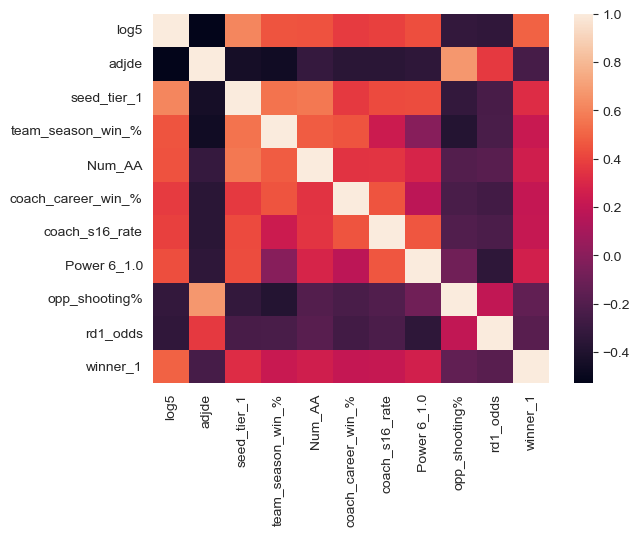

In [27]:
# Import seaborn
import seaborn as sns

# Create correlation matrix
df4heatmaps = df_modeling

# Compute the correlation matrix 
corr = df4heatmaps.corr()

# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [28]:
# Logit Model: Predict Winner

# Import packages
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
y_train = df_train[DV]
x_train = df_train.drop(columns=[DV])

# Function to get summary coefficients
def summary_coef(model_object):
    n_predictors = x_train.shape[1]
    model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=x_train.columns.values)
    model_coef['Intercept'] = model_object.intercept_
    return model_coef.transpose()

# Run Logistic regression with pre-specified penalty level (alpha)
# Placeholder variable: alpha
alpha = 10

# The Logistic regression results are put into a model object clf
clf_logit = LogisticRegression(C=1/alpha, penalty='l2', solver='lbfgs', max_iter=200, random_state=1).fit(x_train,y_train)

# Display summary coefficients
print(summary_coef(clf_logit))

# Placeholder variable: kfolds
kfolds = 5

# Here we specify within which range of the penalty levels we will search for the optimal penalty level, 
# i.e., the level that leads to the best model candidate
# We search the optimal alpha within [min_alpha, max_alpha]
min_alpha = 0.001
max_alpha = 100

# We further discretize the continuous alpha range [min_alpha, max_alpha] into n individual points of alpha
# We train n model candidates each of which corresponds to one individual alpha point
n_candidates = 1000

import numpy as np

# We store the list of individual alpha points into alpha_list
alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))

# C_list is the element-wise inverse of alpha_list. It is required as one of the parameter values for LogisticRegressionCV
C_list = list(1/np.linspace(min_alpha, max_alpha, num=n_candidates))

# Set n_jobs to be -1 to run LogisticRegressionCV on all CPU cores.
clf_optimal_logit = LogisticRegressionCV(Cs=C_list, cv=kfolds, penalty='l2', solver='saga', max_iter=500, random_state=1, n_jobs=-1).fit(x_train,y_train)

# Display the estimated coefficients of the final selected model
print(summary_coef(clf_optimal_logit))

# Display the optimal alpha that yields the final selected model (the best model candidate)
print(1/clf_optimal_logit.C_)

# Calculate the error rate over the test partition based on the final selected model

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_test[DV]

# X_test is the predictor values in the test partition
X_test = df_test.drop(columns=[DV])

# y_test_predicted is the predicted values of the DV in the test partition 
y_test_predicted_logit = clf_optimal_logit.predict(X_test)

# Import the metrics package
from sklearn import metrics

# Display the confusion matrix over the test partition
print(metrics.confusion_matrix(y_test_actual, y_test_predicted_logit))

# Display the accuracy over the test partition
print(f"{(clf_optimal_logit.score(X_test, y_test_actual)*100):.3f}%")

                           0
log5                1.083118
adjde               0.042930
seed_tier_1        -0.039933
team_season_win_%   0.022536
Num_AA              0.117923
coach_career_win_%  0.054843
coach_s16_rate      0.017431
Power 6_1.0         0.314100
opp_shooting%       0.050901
rd1_odds           -0.041429
Intercept          -0.199664
                           0
log5                1.072800
adjde               0.039639
seed_tier_1        -0.030867
team_season_win_%   0.021268
Num_AA              0.118228
coach_career_win_%  0.054619
coach_s16_rate      0.018653
Power 6_1.0         0.306815
opp_shooting%       0.051376
rd1_odds           -0.042909
Intercept          -0.198343
[11.91279279]
[[169  80]
 [ 79 198]]
69.772%


In [29]:
# Create a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Create RF classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create param grid
kfolds = 5
minimum_depth = 1
maximum_depth = 10

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

gridsearch = GridSearchCV(rf_classifier, param_grid, cv=kfolds, n_jobs=-1)
gridsearch.fit(x_train,y_train)
#clf_rf = gridsearch.best_estimator_

# Train the Random Forest classifier on the training data
clf_rf = rf_classifier.fit(x_train, y_train)

# y_test_predicted is the predicted values of the DV in the test partition 
y_test_predicted_rf = clf_rf.predict(X_test)

# Calculate accuracy between predicted and actual y values over test partition
rf_test_accuracy = accuracy_score(y_test_actual, y_test_predicted_rf)

# Display the confusion matrix over the test partition
print(metrics.confusion_matrix(y_test_actual, y_test_predicted_rf))

# Print accuracy
print(f"{(rf_test_accuracy*100):.3f}%")

[[158  91]
 [ 74 203]]
68.631%


In [30]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a base classifier (weak classifier)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with 50 weak learners
adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
clf_ada = adaboost_classifier.fit(x_train, y_train)

# y_test_predicted is the predicted values of the DV in the test partition
y_test_predicted_ada = clf_ada.predict(X_test)

# Calculate accuracy between predicted and actual y values over test partition
ada_test_accuracy = accuracy_score(y_test_actual, y_test_predicted_ada)

# Display the confusion matrix over the test partition
print(metrics.confusion_matrix(y_test_actual, y_test_predicted_ada))

# Print accuracy
print(f"{(ada_test_accuracy*100):.3f}%")

[[172  77]
 [ 84 193]]
69.392%


/Users/paulkim/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [31]:
# Prepare 2019 data for initial csv prediction
df_2019 = df_cleaned[df_cleaned['year'] == 2019]

# Drop columns from 2019 dataset
drop_cols_modeling = ['game_id', 'id', 'coach_id', 'year', 'team', 'seed']
df_2019_test = df_2019.drop(columns=drop_cols_modeling)

# Get dummies for 2019 dataset
df_2019_test = pd.get_dummies(df_2019_test, prefix_sep='_')
df_2019_test = df_2019_test.drop(columns=rdummies)

# Standardize 2019 dataset
df_2019_test_normalized = df_2019_test.copy()
df_2019_test_normalized[nvar_list] = (df_2019_test_normalized[nvar_list] - df_2019_test_normalized[nvar_list].mean())/df_2019_test_normalized[nvar_list].std()

# Get model features
df_2019_test = df_2019_test[model_features]
df_2019_test_normalized = df_2019_test_normalized[model_features]

In [32]:
# Prepare 2024 data for final csv predictions
df_2024 = df_cleaned[df_cleaned['year'] == 2024]

# Filter 2024 data for winning records only to get unique records (2278 rows)
df_2024 = df_2024[df_2024['winner'] == 1]

# Drop columns from 2019 dataset
drop_cols_modeling = ['game_id', 'id', 'coach_id', 'year', 'team', 'seed']
df_2024_test = df_2024.drop(columns=drop_cols_modeling)

# Get dummies for 2019 dataset
df_2024_test = pd.get_dummies(df_2024_test, prefix_sep='_')
df_2024_test = df_2024_test.drop(columns=rdummies)

# Standardize 2019 dataset
df_2024_test_normalized = df_2024_test.copy()
df_2024_test_normalized[nvar_list] = (df_2024_test_normalized[nvar_list] - df_2024_test_normalized[nvar_list].mean())/df_2024_test_normalized[nvar_list].std()

# Get model features
df_2024_test = df_2024_test[model_features]
df_2024_test_normalized = df_2024_test_normalized[model_features]

In [33]:
# Create function that makes predictions

def PredictResults(model, df, normalized_df):
    # Drop the target variable from the test dataset
    df_predict = normalized_df.drop(columns=[DV])

    # Predict winner probabilities
    predicted_probs = model.predict_proba(df_predict)[:, 1]

    # Convert list of predictions to DataFrame
    df_predicted_probs = pd.DataFrame(predicted_probs).reset_index(drop=True)

    # Get game_id from the original 2019 dataframe
    df_winners = df.copy()
    df_winners = df_winners['game_id'].reset_index(drop=True)
    
    # Get predicted probabilities for each game
    df_predictions = pd.merge(df_predicted_probs, df_winners, left_index=True, right_index=True)

    # Rename and reorder fields
    df_predictions = df_predictions.rename(columns={0: 'prob'})
    df_final_predictions = df_predictions[['game_id', 'prob']]
    
    # Round probabilities
    df_final_predictions['prob'] = df_final_predictions['prob'].round(decimals=4)
    
    return df_final_predictions

def GetKPIs(df, df_final_predictions):
    
    # Get actual results from df
    df_winners = df['winner'].reset_index(drop=True)
    y_true = df_winners.tolist()
    
    # Get predicted results from df_final_predictions
    y_predicted = df_final_predictions['prob'].tolist()

    # Convert y_predicted to binary
    y_predicted_binary = [1 if x > 0.5 else 0 for x in y_predicted]

    # Calculate metrics
    from sklearn import metrics
    from sklearn.metrics import log_loss
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

    loss = log_loss(y_true, y_predicted)
    auc = metrics.roc_auc_score(y_true, y_predicted)
    precision = precision_score(y_true, y_predicted_binary)
    recall = recall_score(y_true, y_predicted_binary)
    f_score = f1_score(y_true, y_predicted_binary)
    accuracy = accuracy_score(y_true, y_predicted_binary)

    # Print metrics
    print(f"KPIs for selected model:")
    print(f"Log Loss: {loss:.3f}")
    print(f"AUC: {auc:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F-Score: {f_score:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    

In [34]:
# Create df of predicted probabilities on 2019 test
df_predictions_logit = PredictResults(clf_optimal_logit, df_2019, df_2019_test_normalized)
df_predictions_rf = PredictResults(clf_rf, df_2019, df_2019_test_normalized)
df_predictions_ada = PredictResults(clf_ada, df_2019, df_2019_test_normalized)

# Get metrics for predictions
test_df = df_2019
predictions_df = df_predictions_logit

# Get results for logistic regression
GetKPIs(test_df, predictions_df)


KPIs for selected model:
Log Loss: 0.485
AUC: 0.857
Precision: 0.750
Recall: 0.761
F-Score: 0.756
Accuracy: 0.754


In [35]:
# Get metrics for random forest
test_df = df_2019
predictions_df = df_predictions_rf

# Get results for logistic regression
GetKPIs(test_df, predictions_df)

KPIs for selected model:
Log Loss: 0.474
AUC: 0.863
Precision: 0.814
Recall: 0.716
F-Score: 0.762
Accuracy: 0.776


In [36]:
# Get predictions for AdaBoost

# Get metrics for predictions
test_df = df_2019
predictions_df = df_predictions_ada

# Get results for logistic regression
GetKPIs(test_df, predictions_df)

KPIs for selected model:
Log Loss: 0.684
AUC: 0.833
Precision: 0.746
Recall: 0.746
F-Score: 0.746
Accuracy: 0.746


In [ ]:
# Write output files
from datetime import date
date_stamp = str(date.today())

# Write output files
df_cleaned.to_excel("Output Data_Review_"+date_stamp+".xlsx")
df_main[model_features].to_excel("Training Data_CT_"+date_stamp+".xlsx")
df_modeling.to_excel("Training Data_Standardized_"+date_stamp+".xlsx")
df_2019_test.to_excel("Testing Data_2019_CT_"+date_stamp+".xlsx")
df_2019_test_normalized.to_excel("Testing Data_2019_Standardized_"+date_stamp+".xlsx")

In [39]:
# Predicted probabilities with 2024 data
df_2024_raw = pd.read_csv('DATA/NCAA_Tourney_2024.csv')

# Get game id, team ids, and team names
df_2024_raw = df_2024_raw[['game_id', 'team1_id', 'team1_teamname', 'team1_seed', 'team2_id', 'team2_teamname', 'team2_seed', 'slot']]

# Choose model to predict
classifier = clf_rf

# Get 2024 predictions
predictions_2024 = PredictResults(classifier, df_2024, df_2024_test_normalized)

# Join raw 2024 data with 2024 predicted probabilities
df_2024_final = pd.merge(df_2024_raw, predictions_2024, on=['game_id'], how='inner')

# Add 10% buffer to probabilities less than 10%
df_2024_final.loc[df_2024_final['prob'] < 0.1, 'prob'] += 0.1

# Preview data
df_2024_final = df_2024_final.sort_values(by=['slot', 'team1_id'], ascending=True).reset_index(drop=True)

# Get csv for 2024 final prediction
df_2024_final_csv = df_2024_final[['game_id', 'prob']]

# Output 2024 probabilities review & csv file
df_2024_final.to_excel("2024 Final Predictions.xlsx")
df_2024_final_csv.to_csv("Final Fourmulas.csv")